# **Import Library**

In [2]:
#Import library untuk memudahkan proses pembuatan visualisasi data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import plotly.express as px

#Import warnings untuk meminimalisir error (pemberitahuan tidak penting)
import warnings
warnings.filterwarnings("ignore")

# **Import Dataset**

In [3]:
#Dragg file dataset dan import menjadi sebuah dataframe
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Pemisahan Variabel**

Pemisahan variabel berguna untuk memahami informasi data dan mudah untuk mengolah datanya

## **VARIABEL NUMERIK**

In [4]:
#Mengecualikan data yang bersifat objek sehingga diperoleh data numerik
df_numerical_features = df.select_dtypes(exclude='object')
df_numerical_features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


## **VARIABEL CATEGORICAL**

In [5]:
#Melihat data yang bersifat objek sehingga diperoleh data categorical
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


# **MISSING VALUE CHECKING**

In [6]:
#Mencari tau detail missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Mengatasi missing value Embarked
#Karena missingnya sedikit maka bisa dihapus rownya
df = df.dropna(subset=['Embarked'])

In [8]:
#Mengatasi missing value Cabin
#Karena jumlah missingnya banyak dapat diatasi dengan Categorical Imputation
#Diisi unknown
df['Cabin'] = np.where(df['Cabin'].isnull(),"Unk",df['Cabin'])

In [9]:
#Mengatasi Missing value Age
#Karena kolomnya tidak ingin dihapus
#Maka dapat menggunakan metode Numeric Imputation
#Diisi umur rata-rata
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
#Cek untuk memastikan jumlah missing hilang
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# **Comparison**

## **Pembuatan barplot (horizontal dan vertikal)**

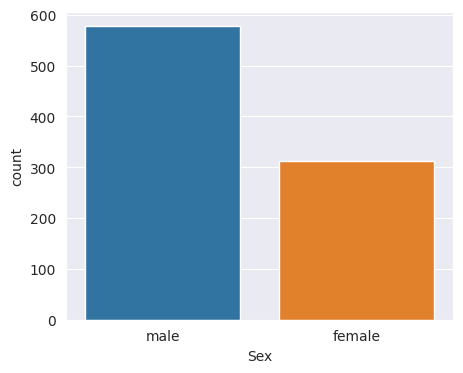

In [11]:
#Mengset style gridnya
sns.set_style("darkgrid")
#Mengubah ukuran gambar barplot nya
plt.figure(figsize = (5,4))
#Menghitung jumlah variabelnya
sns.countplot(x= 'Sex', data = df)
#Barplot ditampilkan
plt.show()

Berdasarkan barplot diatas, proporsi jumlah penumpang kapal Titanic yang berjenis kelamin laki-laki lebih banyak dibandingkan jumlah penumpang wanita.

<Axes: xlabel='count', ylabel='Age'>

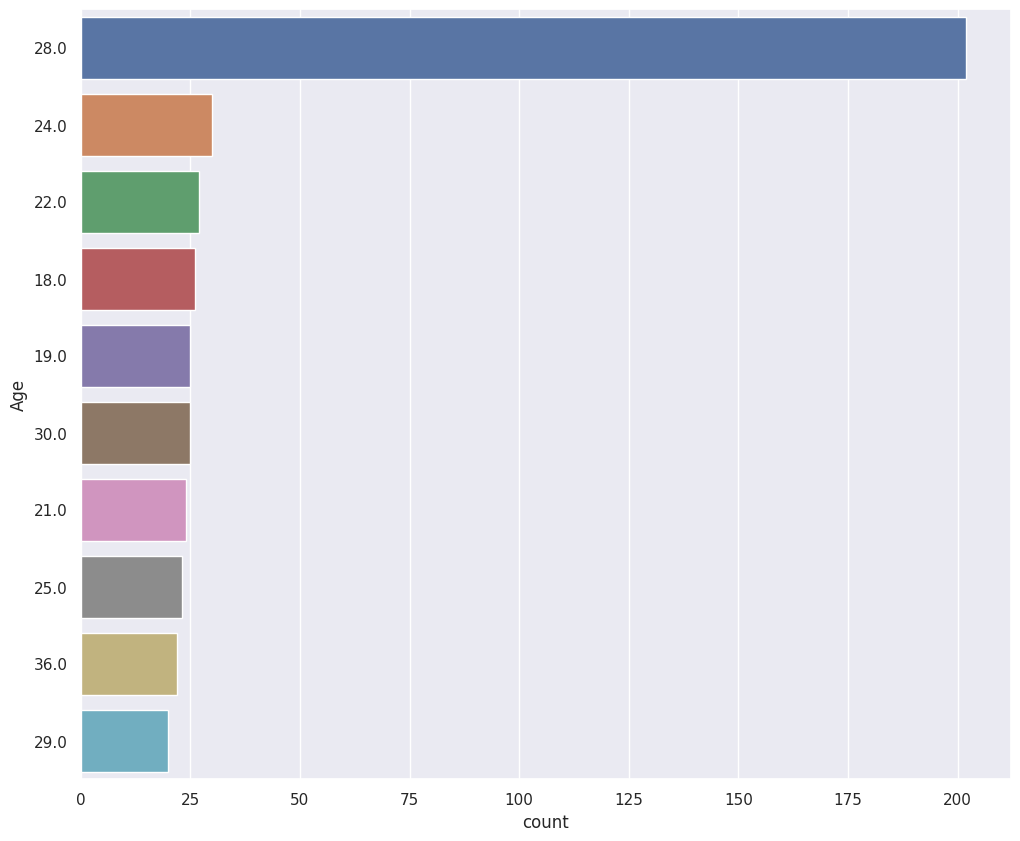

In [12]:
#Mengatur ukuran gambarnya
plt.figure(figsize=(12,10))
#Mengset style
sns.set(style="darkgrid")
#Membuat top 10 umur penumpang terbanyak secara horizontal
sns.countplot(y="Age", data=df, order=df['Age'].value_counts().index[0:10])

Berdasarkan top 10, jumlah penumpang dengan umur terbanyak dapat dilihat bahwa penumpang dengan kisaran umur 28 tahun paling banyak menaiki kapal Titanic dibandingkan dengan jumlah umur lainnya. Selain itu, jika dilihat persebaran data Age maka diketahui bahwa penumpang yang menaiki kapal Titanic memiliki umur sangat beragam.

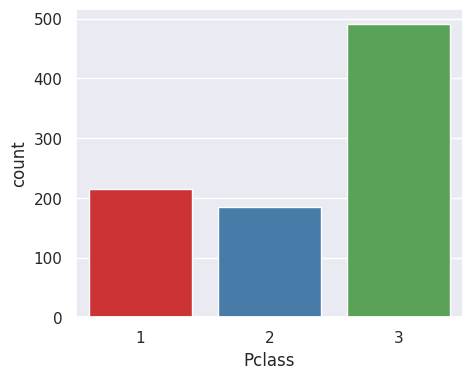

In [13]:
#Mengset style
sns.set_style("darkgrid")
#Mengatur ukuran plot
plt.figure(figsize = (5,4))
#Menghitung jumlah variabel
sns.countplot(x= 'Pclass', data = df, palette='Set1')
#Barplot ditampilkan
plt.show()

In [14]:
#jumlah keseluruhan harga tiket
#Untuk menganalisis faktor penumpang kelas terbanyak
df.groupby('Pclass').agg({'Fare':['sum']})

,Fare
,sum
Pclass,
1,18017.4125
2,3801.8417
3,6714.6951


Penumpang kelas 3 memiliki jumlah terbanyak yang menaiki kapal Titanic dan disusul oleh penumpang kelas 1 lalu kelas 2. Jika dianalisis dari jumlah harga tiket dapat diketahui bahwa penumpang kelas 3 memiliki harga tiket yang lebih rendah dibanding kelas 2 dan 1. Hal itu dibuktikan dari jumlah keseluruhan penumpang kelas 3 paling banyak diantara yang lain tetapi jumlah "Fare" tidak sebanyak itu bahkan hanya 2x lipat jumlah Pclass 2 yang mana jumlah penumpangnya paling sedikit. Dengan demikian, faktor harga tiket yang rendah pada kelas 3 mengakibatkan faktor banyaknya penumpang dari kelas 3.

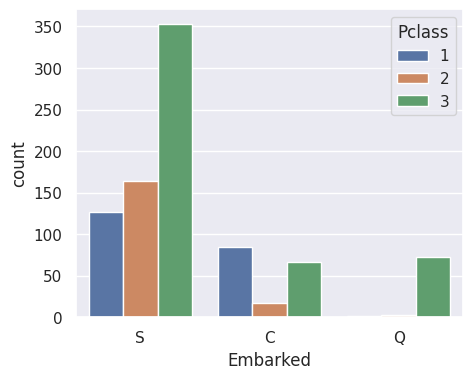

In [15]:
#Mengatur style
sns.set_style("darkgrid")
#Mengatur ukuran plotnya
plt.figure(figsize = (5,4))
#Menghitung jumlah variabel dengan menambah variabel lainnya sebagai pembanding
sns.countplot(x= 'Embarked', data = df,hue='Pclass')
#Barplot ditampilkan
plt.show()

Berdasarkan bar plot tersebut, keberangkatan penumpang kapal Titanic terbanyak bagi kelas 1, 2, dan 3 berasal dari pelabuhan S atau Southampton



**Menganalisis Penumpang yang selamat (survived) dan tidak selamat (not survived) berdasarkan jenis kelamin dan kelas tiket**

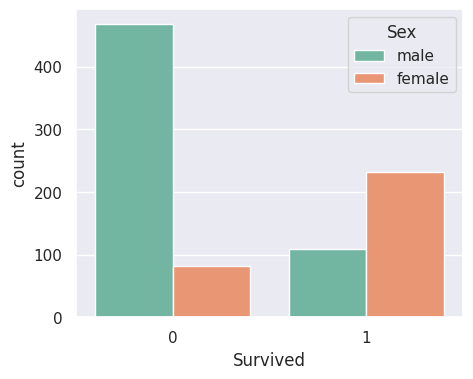

In [16]:
#Mengatur style
sns.set_style("darkgrid")
#Mengatur ukuran plotnya
plt.figure(figsize = (5,4))
#Menghitung jumlah variabel dengan menambah variabel lainnya sebagai pembanding dan mengatur warna barplot
sns.countplot(x= 'Survived', data = df,hue='Sex', palette='Set2')
#Barplot ditampilkan
plt.show()

Jumlah penumpang yang selamat didominasi oleh kalangan wanita. Hal tersebut karena, jumlah pria yang menaiki kapal Titanic lebih banyak daripada wanita sehingga mengakibatkan pria yang tidak selamat dari tragedi tersebut lebih banyak dibanding wanita karena kesulitan ketika menyelamatkan akibat banyaknya jumlah pria tersebut. Selain itu, faktor lain menurut beberapa sumber dan informasi di Internet wanita banyak yang selamat karena lebih didahulukan ketika menaiki sekoci saat keadaannya darurat.

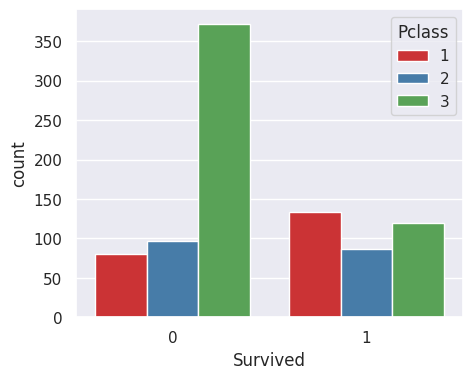

In [17]:
#Mengatur style
sns.set_style("darkgrid")
#Mengatur ukuran
plt.figure(figsize = (5,4))
#Menghitung jumlah variabel dengan menambah variabel lainnya sebagai pembanding dan mengatur warna barplot
sns.countplot(x= 'Survived', data = df,hue='Pclass', palette='Set1')
#Barplot ditampilkan
plt.show()

Berdasarkan bar chart diatas penumpang kelas 3 paling banyak tidak selamat dan penumpang kelas 1 paling banyak selamat. Hal tersebut karena penumpang kelas 3 memiliki jumlah orang yang paling banyak dibandingkan Pclass lainnya sehingga terdapat beberapa faktor yang mengakibatkan kesulitan penyelamatan akibat jumlah orangnya yang paling banyak dibanding lainnya.

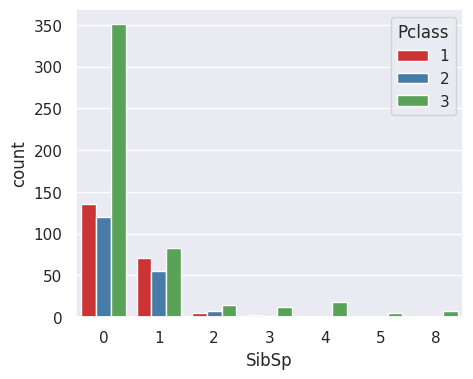

In [18]:
#Mengatur style
sns.set_style("darkgrid")
#Mengatur ukuran plotnya
plt.figure(figsize = (5,4))
#Menghitung jumlah variabel dengan menambah variabel lainnya sebagai pembanding dan mengatur warna barplot
sns.countplot(x= 'SibSp', data = df,hue='Pclass', palette='Set1')
#Barplot ditampilkan
plt.show()

Penumpang dikapal Titanic sebagian besar tidak memiliki saudara di kapal (0) sehingga rata-rata penumpang berangkat dengan tidak bersama saudaranya.

# **Distribution**

## **Pembuatan distplot**

<Axes: xlabel='Age', ylabel='Density'>

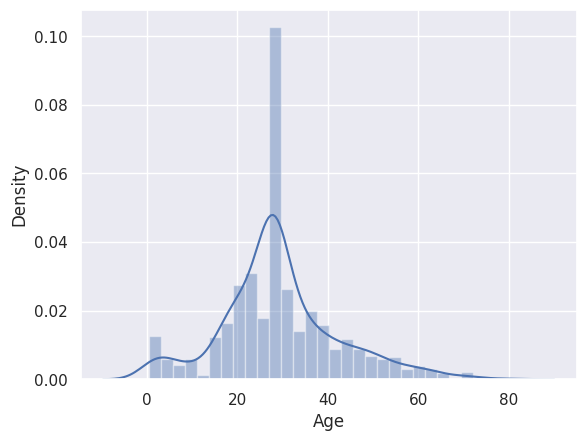

In [19]:
sns.distplot(df['Age'])

Variabel "Age" terdistribusi normal karena plotnya cenderung melandai seperti lonceng atau menaik seperti gunung.

<Axes: xlabel='Fare', ylabel='Density'>

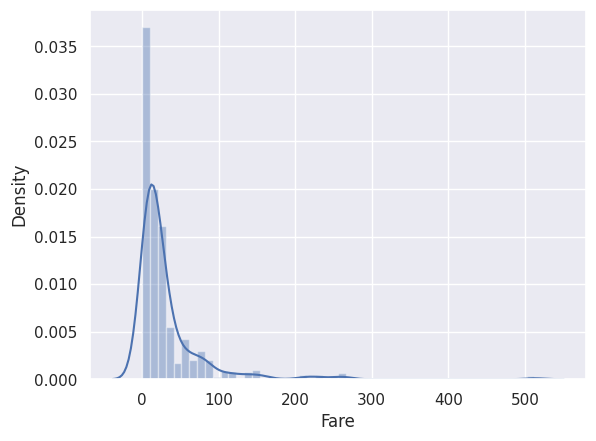

In [20]:
sns.distplot(df['Fare'])

Pada variabel "Fare" distribusinya kurang normal dan cenderung terdistribusi pada range 0-100.

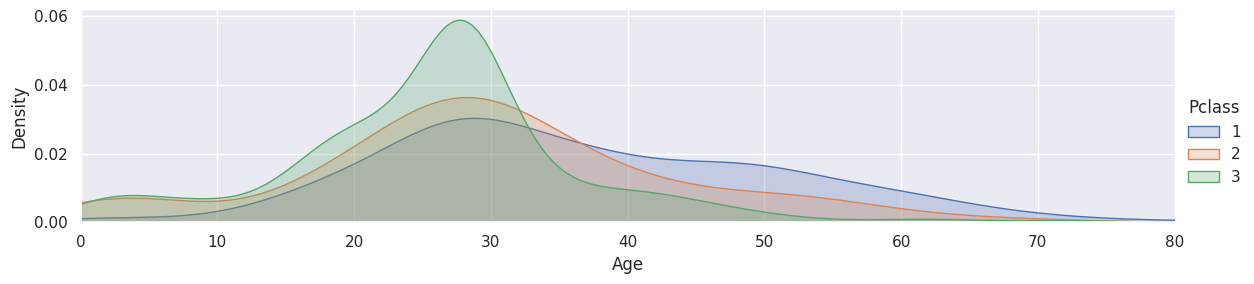

In [21]:
fig = sns.FacetGrid(df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Berdasarkan distribudi umur terhadap kelas penumpang tersebut, dapat diketahui bahwa penumpang kelas 1 berdistribusi normal, penumpang kelas 2 dan penumpang kelas 3 lebih mengarah ke terdistribusi pada range umur 20–30.

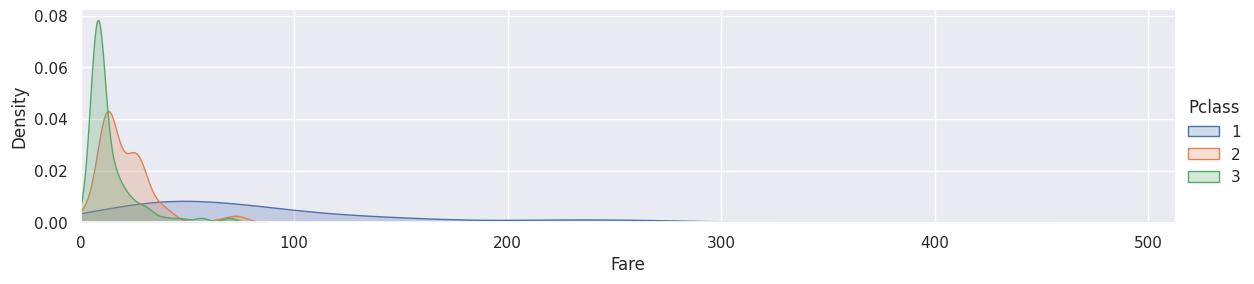

In [22]:
facet = sns.FacetGrid(df, hue="Pclass",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
 
plt.show()

Berdasarkan distribudi tiket terhadap kelas penumpang tersebut, dapat diketahui bahwa penumpang kelas 1 , penumpang kelas 2 dan penumpang kelas 3 kurang terdistribusi secara normal dan berada pada range tertentu.

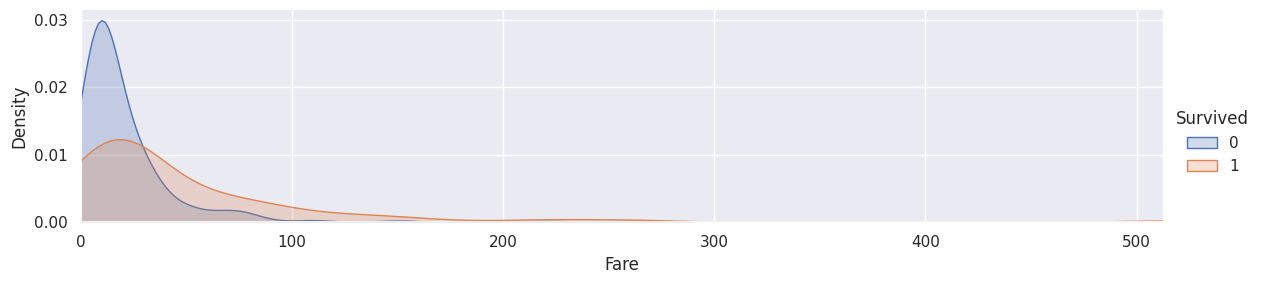

In [23]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
 
plt.show()

Berdasarkan hasil plot, Variabel "Fare" kurang terdistribusi secara normal dan berada pada kisaran range <50 baik pada kondisi 1 (survived) maupun 0 (Not survived)

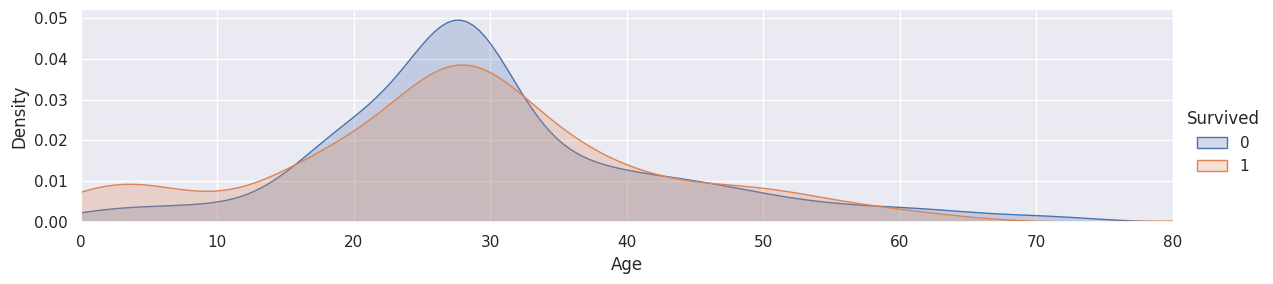

In [24]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
 
plt.show()

Berdasarkan plot tersebut, distribusi Age terhadap variabel survived terdistribusi secara normal. Distribusi menggambarkan seberapa sering sesuatu terjadi dalam rentang tertentu. Pada distribusi ini paling banyak berada pada kisaran umur 20-30.

## **Pembuatan boxplot**

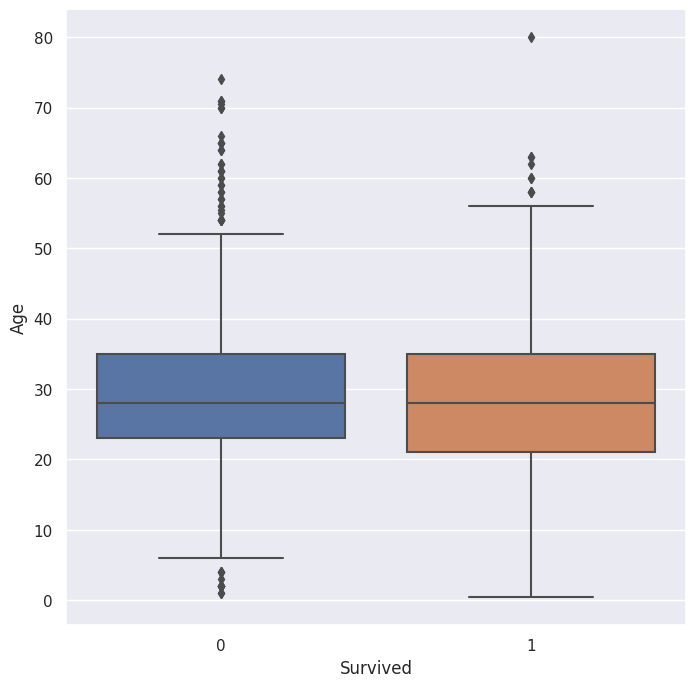

In [25]:
#Mengatur ukuran
plt.figure(figsize=(8,8))
#Membuat boxplot dari variabel x,y
sns.boxplot(x="Survived", y="Age", data = df)
#Boxplot ditampilkan
plt.show()

Pada boxplot tersebut, nilai median dari kondisi survived dan not survived sama. Namun, variasi data umur di survived lebih banyak.

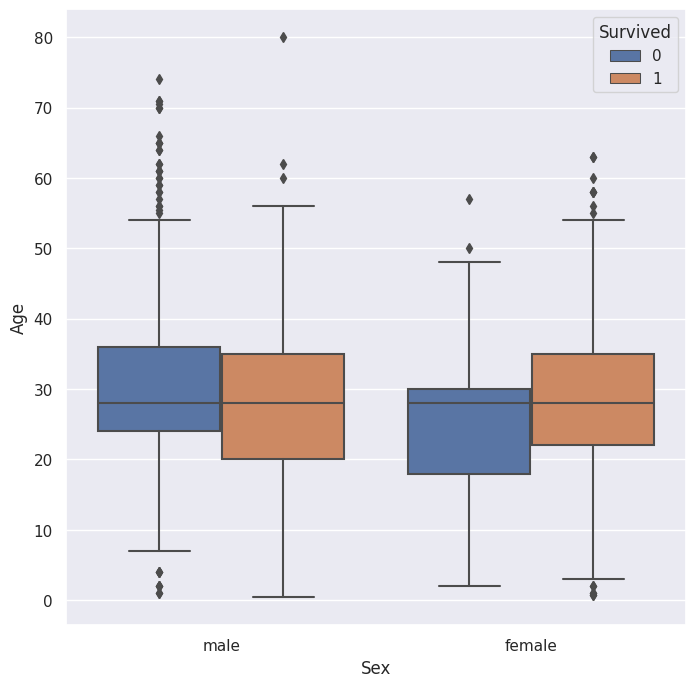

In [26]:
#Mengatur ukuran
plt.figure(figsize=(8,8))
#Membuat boxplot variabel x,y dan tambahan
sns.boxplot(x="Sex", y="Age", data = df, hue="Survived")
#Boxplot ditampilkan
plt.show()

Median dari data male female sejajar dan saling beririsan. Variasi umur pada male lebih banyak dibandingkan female.

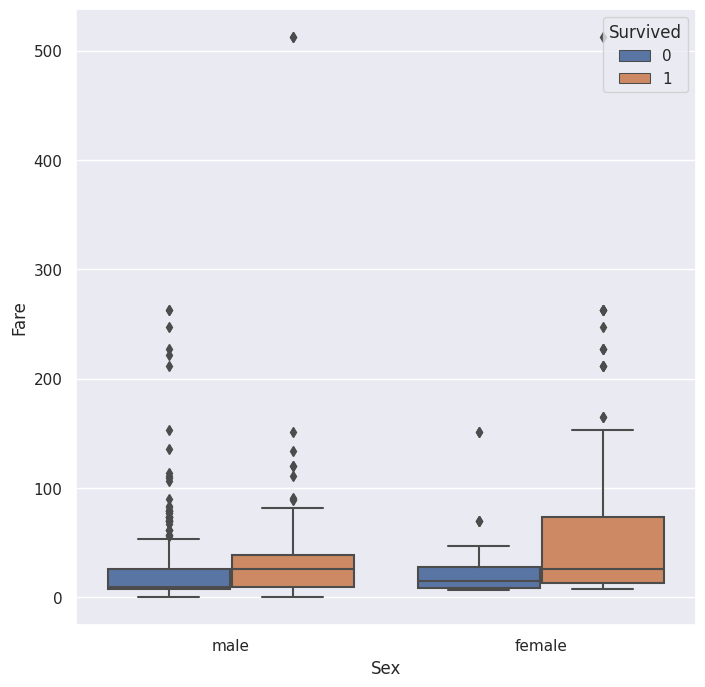

In [27]:
#Mengatur ukuran
plt.figure(figsize=(8,8))
#Membuat boxplot variabel x, y, dan tambahan
sns.boxplot(x="Sex", y="Fare", data=df, hue="Survived")
#Boxplot ditampilkan
plt.show()

Median dari data ini tidak sejajar dan variasi data di variabel sex female lebih banyak dibandingkan male. Selain itu, data female harga tiket dikondisi (1) yaitu survived lebih besar dibandingkan lainnya.

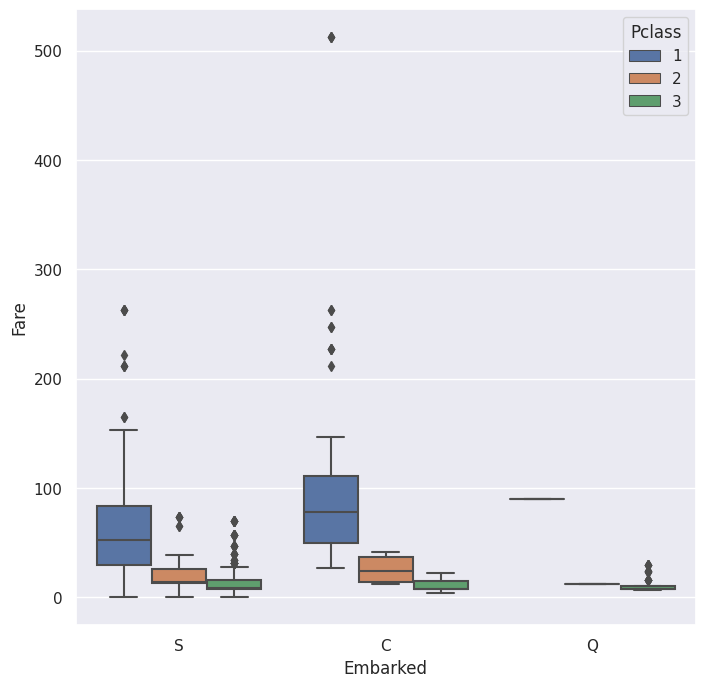

In [28]:
#Mengatur ukuran
plt.figure(figsize=(8,8))
#Membuat boxplot variabel x, y, dan tambahan
sns.boxplot(x="Embarked", y="Fare", data=df, hue="Pclass")
#Boxplot ditampilkan
plt.show()

Dari data tersebut, mediannya tidak sejajar serta tidak beririsan. Kemudian di Embarked C variasi datanya lebih banyak dari lainnya dan didominasi oleh penumpang kelas 1. Selain itu, variasi data di Embarked S dan Q tidak lebih banyak dari C atau lebih kecil.

# **Relationship**

## **Pembuatan scatterplot**

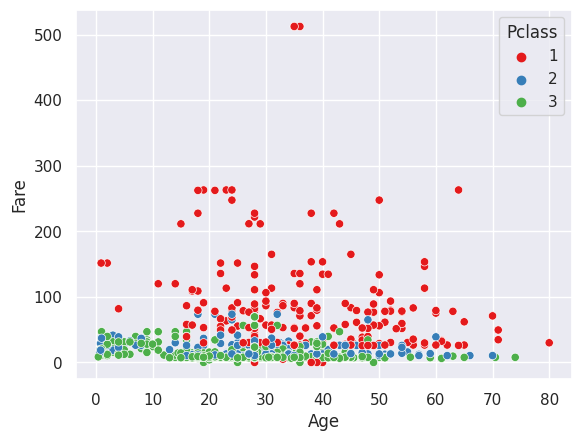

In [29]:
#Melihat persebaran data dari variabel Age dan Fare menggunakan Scatterplot
sns.set(style="darkgrid")
#Membuat plot dengan variabel x (Age), y (Fare) dan menambah variabel lain "Pclass"
sns.scatterplot(x = 'Age', y = 'Fare', data = df, hue='Pclass', palette='Set1')
#Scatterplot ditampilkan
plt.show()

Berdasarkan scatterplot diatas, dari persebaran data usia dan harga tiket dilihat dari tingkatan kelas penumpang. Dari plot ini, terlihat bahwa persebaran datanya luas yang mana dapat terlihat bahwa penumpang kelas 1 diminati semua kalangan umur serta datanya menyebar. Kemudian, di penumpang kelas 3 umur 0-20 paling banyak membeli tiket dengan harga rendah. Selain itu, penumpang kelas 3 mendominasi pembelian tiket dan merupakan penumpang dengan jumlah terbanyak sehingga datanya mengumpul tidak terlalu menyebar luas.

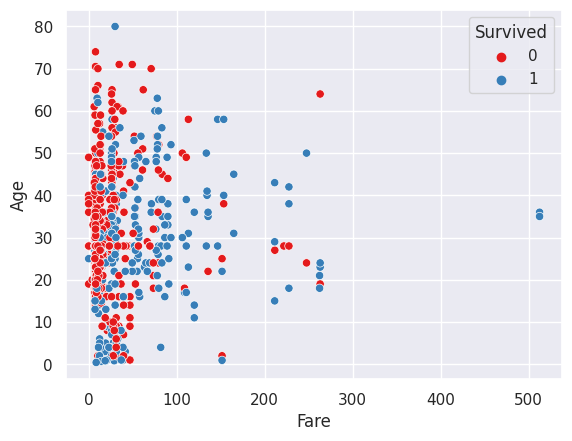

In [30]:
#Melihat persebaran data dari variabel Fare dan Age menggunakan Scatterplot
sns.set(style="darkgrid")
#Variabel x dan y ditukar dan ditambahkan variabel lain yaitu "Survived"
sns.scatterplot(x = 'Fare', y = 'Age', data = df, hue='Survived', palette='Set1')
#Scatterplot ditampilkan
plt.show()

Di seaborn scatterplot ini, didapatkan presentasi  tentang kepadatan penumpang dengan harga tiket pada usia tertentu. Titik warna merah menandakan penumpang tewas, sedangkan biru menandakan selamat. Dari hal ini, dapat diketahui bahwa kepadatan kematian yang tinggi terjadi di antara penumpang kelas bawah dengan harga antara usia 17 dan 45 tahun. Kita dapat melihat bahwa ada kecenderungan bertahan hidup seiring dengan kenaikan harga tiket atau disebut juga (Pclass 1), dan juga seiring dengan penurunan usia.

# **Composition**

## **Pembuatan pie chart**

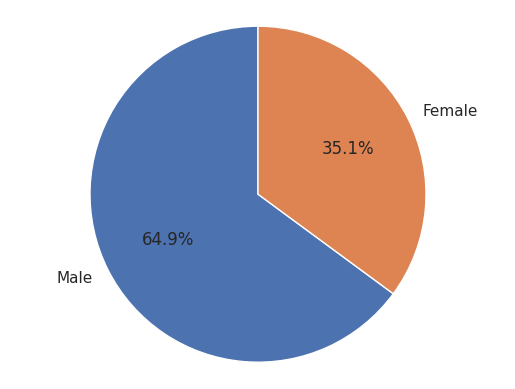

In [33]:
# Jumlahkan the number of the variable
Male = len(df[df['Sex'] == 'male'])
Female = len(df[df['Sex'] == 'female'])

# Buatlah a pie chart with the counts
labels = ['Male', 'Female']
sizes = [Male, Female]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# pie chart ditampilkan
plt.show()

Penumpang Titanic didominasi oleh pria dengan persentase sebesar 64,9%. Kemudian, penumpang wanita memiliki persentase yang jauh lebih kecil sebesar 35,1%

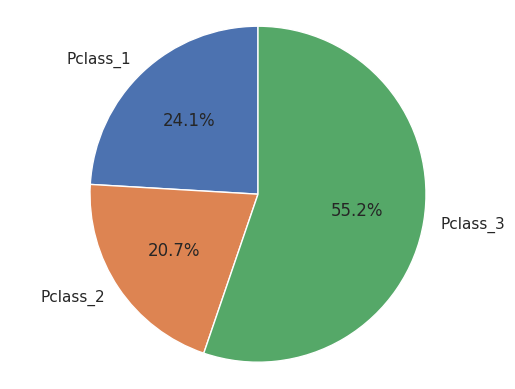

In [34]:
# Jumlahkan the number of the variable
Pclass_1 = len(df[df['Pclass'] == 1])
Pclass_2 = len(df[df['Pclass'] == 2])
Pclass_3 = len(df[df['Pclass'] == 3])

# Buatlah a pie chart with the counts
labels = ['Pclass_1', 'Pclass_2','Pclass_3']
sizes = [Pclass_1,Pclass_2,Pclass_3]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# pie chart ditampilkan
plt.show()

Penumpang kelas 3 mendominasi jumlah keseluruhan penumpang dari seluruh tingkatan kelas. Hal ini dapat disebabkan karena rendahnya harga tiket (fare) sehingga mengakibatkan penumpang kelas 3 paling banyak menaiki kapal Titanic dengan persentase dari keseluruhan sebesar 55,2%.

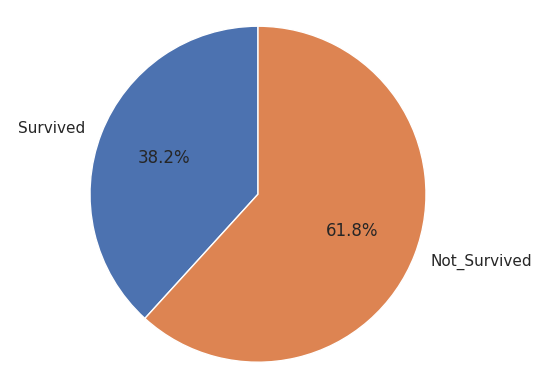

In [37]:
# Jumlahkan the number of the variable
Survived = len(df[df['Survived'] == 1])
Not_Survived = len(df[df['Survived'] == 0])

# Buatlah a pie chart with the counts
labels = ['Survived', 'Not_Survived']
sizes = [Survived, Not_Survived]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# pie chart ditampilkan
plt.show()

Jumlah orang yang selamat dari tragedi Titanic ini ternyata jauh lebih kecil dibandingkan dari orang yang tidak selamat. Penumpang yang selamat hanya berkisar sebesar 38,2% dan penumpang tidak selamat sebesar 61,8%. Hal ini dapat terjadi akibat terlalu banyak penumpang dan dipengaruhi oleh beberapa faktor seperti variabel Sex (wanita atau pria), Pclass (Tingkatan kelas penumpang), dll.

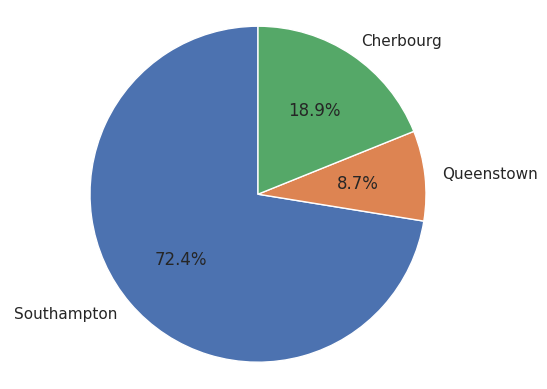

In [36]:
# Jumlahkan the number of the variable
Southampton = len(df[df['Embarked'] == 'S'])
Queenstown = len(df[df['Embarked'] == 'Q'])
Cherbourg = len(df[df['Embarked'] == 'C'])

# Buatlah a pie chart with the counts
labels = ['Southampton', 'Queenstown', 'Cherbourg']
sizes = [Southampton, Queenstown, Cherbourg]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# pie chart ditampilkan
plt.show()

Penumpang kapal Titanic paling banyak berangkat dari pelabuhan Southampton dengan persentase keseluruhan sebesar 72,4%.